1) How will you address null values and what is your strategy for addressing the outliers inthe data?
2) How will you address the imbalance in the dataset?
3) Draw a pair plot with densities for both target classes. Identify which variables could beuseful for classifying the pulsars from non-pulsars.

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv(r'C:\Users\USER\Downloads\pulsar_data_train.csv') 

print (data)

        Mean of the integrated profile  \
0                           121.156250   
1                            76.968750   
2                           130.585938   
3                           156.398438   
4                            84.804688   
...                                ...   
12523                       124.312500   
12524                       115.617188   
12525                       116.031250   
12526                       135.664062   
12527                       120.726562   

        Standard deviation of the integrated profile  \
0                                          48.372971   
1                                          36.175557   
2                                          53.229534   
3                                          48.865942   
4                                          36.117659   
...                                              ...   
12523                                      53.179053   
12524                                      46.7

In [6]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [7]:
data.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0
12527,120.726562,50.472256,0.346178,0.184797,0.769231,11.792603,17.662222,329.548016,0.0


In [8]:
data.info

<bound method DataFrame.info of         Mean of the integrated profile  \
0                           121.156250   
1                            76.968750   
2                           130.585938   
3                           156.398438   
4                            84.804688   
...                                ...   
12523                       124.312500   
12524                       115.617188   
12525                       116.031250   
12526                       135.664062   
12527                       120.726562   

        Standard deviation of the integrated profile  \
0                                          48.372971   
1                                          36.175557   
2                                          53.229534   
3                                          48.865942   
4                                          36.117659   
...                                              ...   
12523                                      53.179053   
12524          

In [9]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [10]:
data.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [11]:
column_names = data.columns

column_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [13]:
# rename column names
data.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [14]:
data.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [18]:
data['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
data['target_class'].value_counts()/np.float(len(data))

0.0    0.907966
1.0    0.092034
Name: target_class, dtype: float64

In [27]:
data.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

1) How will you address null values and what is your strategy for addressing the outliers inthe data?

For missing values we either impute them or remove them from the data

# Checking Outliers 

Text(0, 0.5, 'IP Mean')

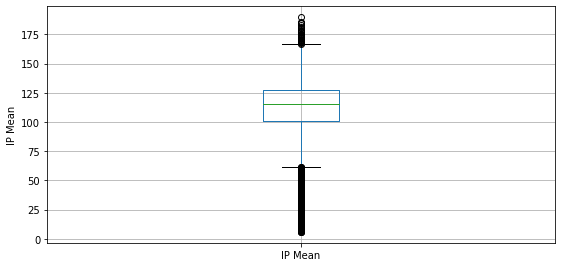

In [33]:
plt.figure(figsize=(20,20))
plt.subplot(4, 2, 1)
fig = data.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')

Text(0, 0.5, 'IP Sd')

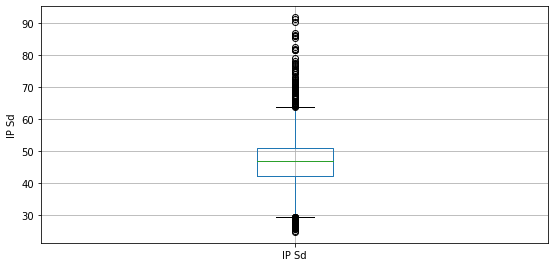

In [35]:
plt.figure(figsize=(20,20))
plt.subplot(4, 2, 2)
fig = data.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')

Text(0, 0.5, 'IP Kurtosis')

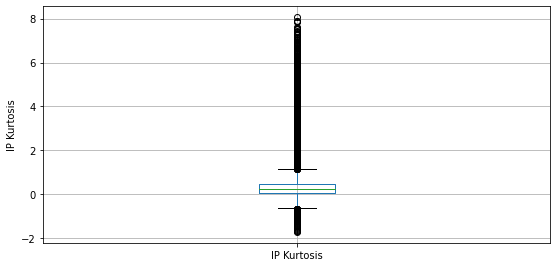

In [36]:
plt.figure(figsize=(20,20))
plt.subplot(4, 2, 3)
fig = data.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


Text(0, 0.5, 'IP Skewness')

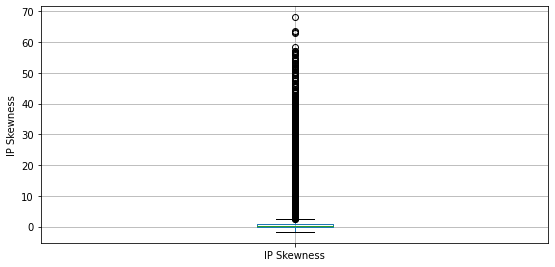

In [38]:
plt.figure(figsize=(20,20))
plt.subplot(4, 2, 4)
fig = data.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')

Text(0, 0.5, 'DM-SNR Mean')

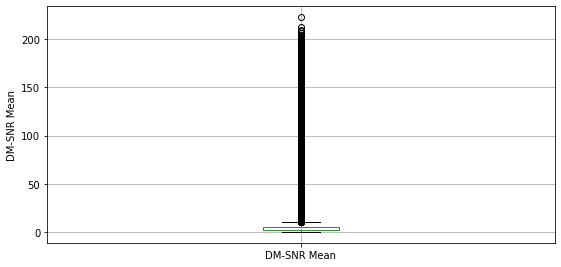

In [39]:
plt.figure(figsize=(20,20))
plt.subplot(4, 2, 5)
fig = data.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')

Text(0, 0.5, 'DM-SNR Sd')

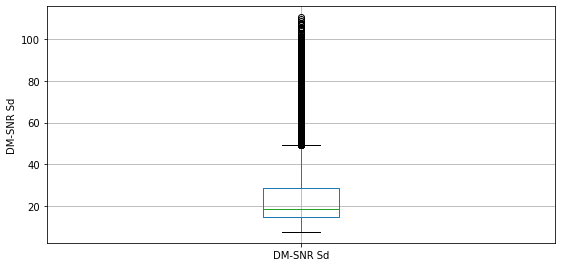

In [40]:
plt.figure(figsize=(20,20))
plt.subplot(4, 2, 6)
fig = data.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')

Text(0, 0.5, 'DM-SNR Kurtosis')

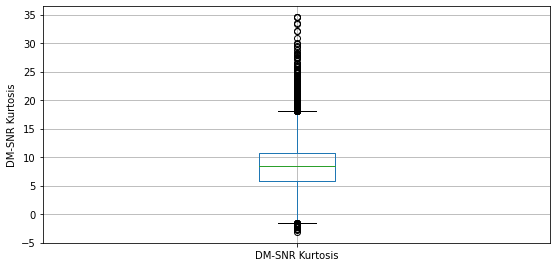

In [44]:
plt.figure(figsize=(20,20))
plt.subplot(4, 2, 7)
fig = data.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')




Text(0, 0.5, 'DM-SNR Skewness')

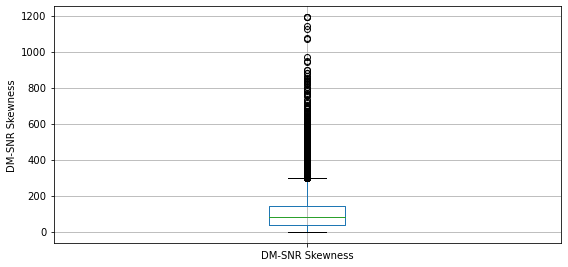

In [42]:
plt.figure(figsize=(20,20))
plt.subplot(4, 2, 8)
fig = data.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

1) How will you address null values and what is your strategy for addressing the outliers inthe data?

Mean/Median imputation

removing the outlier

Hard margin SVM, Soft margin SVM

2.How will you address the imbalance in the dataset?


In [48]:
X = data.drop(['target_class'], axis=1)

y = data['target_class']

In [50]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [51]:
X_train.shape, X_test.shape

((10022, 8), (2506, 8))

In [52]:
cols = X_train.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [53]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [54]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.002200e+04,1.002200e+04,8.616000e+03,1.002200e+04,1.002200e+04,9.090000e+03,1.002200e+04,9.500000e+03
mean,-2.459299e-16,-7.557537e-16,-7.442721e-17,-3.175468e-17,-3.442722e-17,-1.174772e-16,-1.339313e-16,4.592817e-18
std,1.000050e+00,1.000050e+00,1.000058e+00,1.000050e+00,1.000050e+00,1.000055e+00,1.000050e+00,1.000053e+00
min,-4.059253e+00,-3.121855e+00,-2.060343e+00,-5.703669e-01,-4.225211e-01,-9.665725e-01,-2.526379e+00,-9.997646e-01
25%,-3.943394e-01,-6.101706e-01,-4.266826e-01,-3.175801e-01,-3.653436e-01,-6.094788e-01,-5.589324e-01,-6.565951e-01
50%,1.619199e-01,5.986146e-02,-2.415742e-01,-2.549120e-01,-3.355278e-01,-4.066791e-01,2.442155e-02,-2.086985e-01
75%,6.265131e-01,6.579129e-01,-1.143402e-02,-1.397269e-01,-2.459675e-01,1.018419e-01,5.276848e-01,3.194451e-01
max,3.045294e+00,6.647182e+00,7.026077e+00,1.045442e+01,7.074053e+00,4.281896e+00,5.769814e+00,1.009101e+01


We can sample the data to enough increase the minority class proportion ("up-sample") or to sufficiently decrease the majority class proportion ("down-sample"). If required, we could even use both strategies!

3.Draw a pair plot with densities for both target classes. Identify which variables could beuseful for classifying the pulsars from non-pulsars.

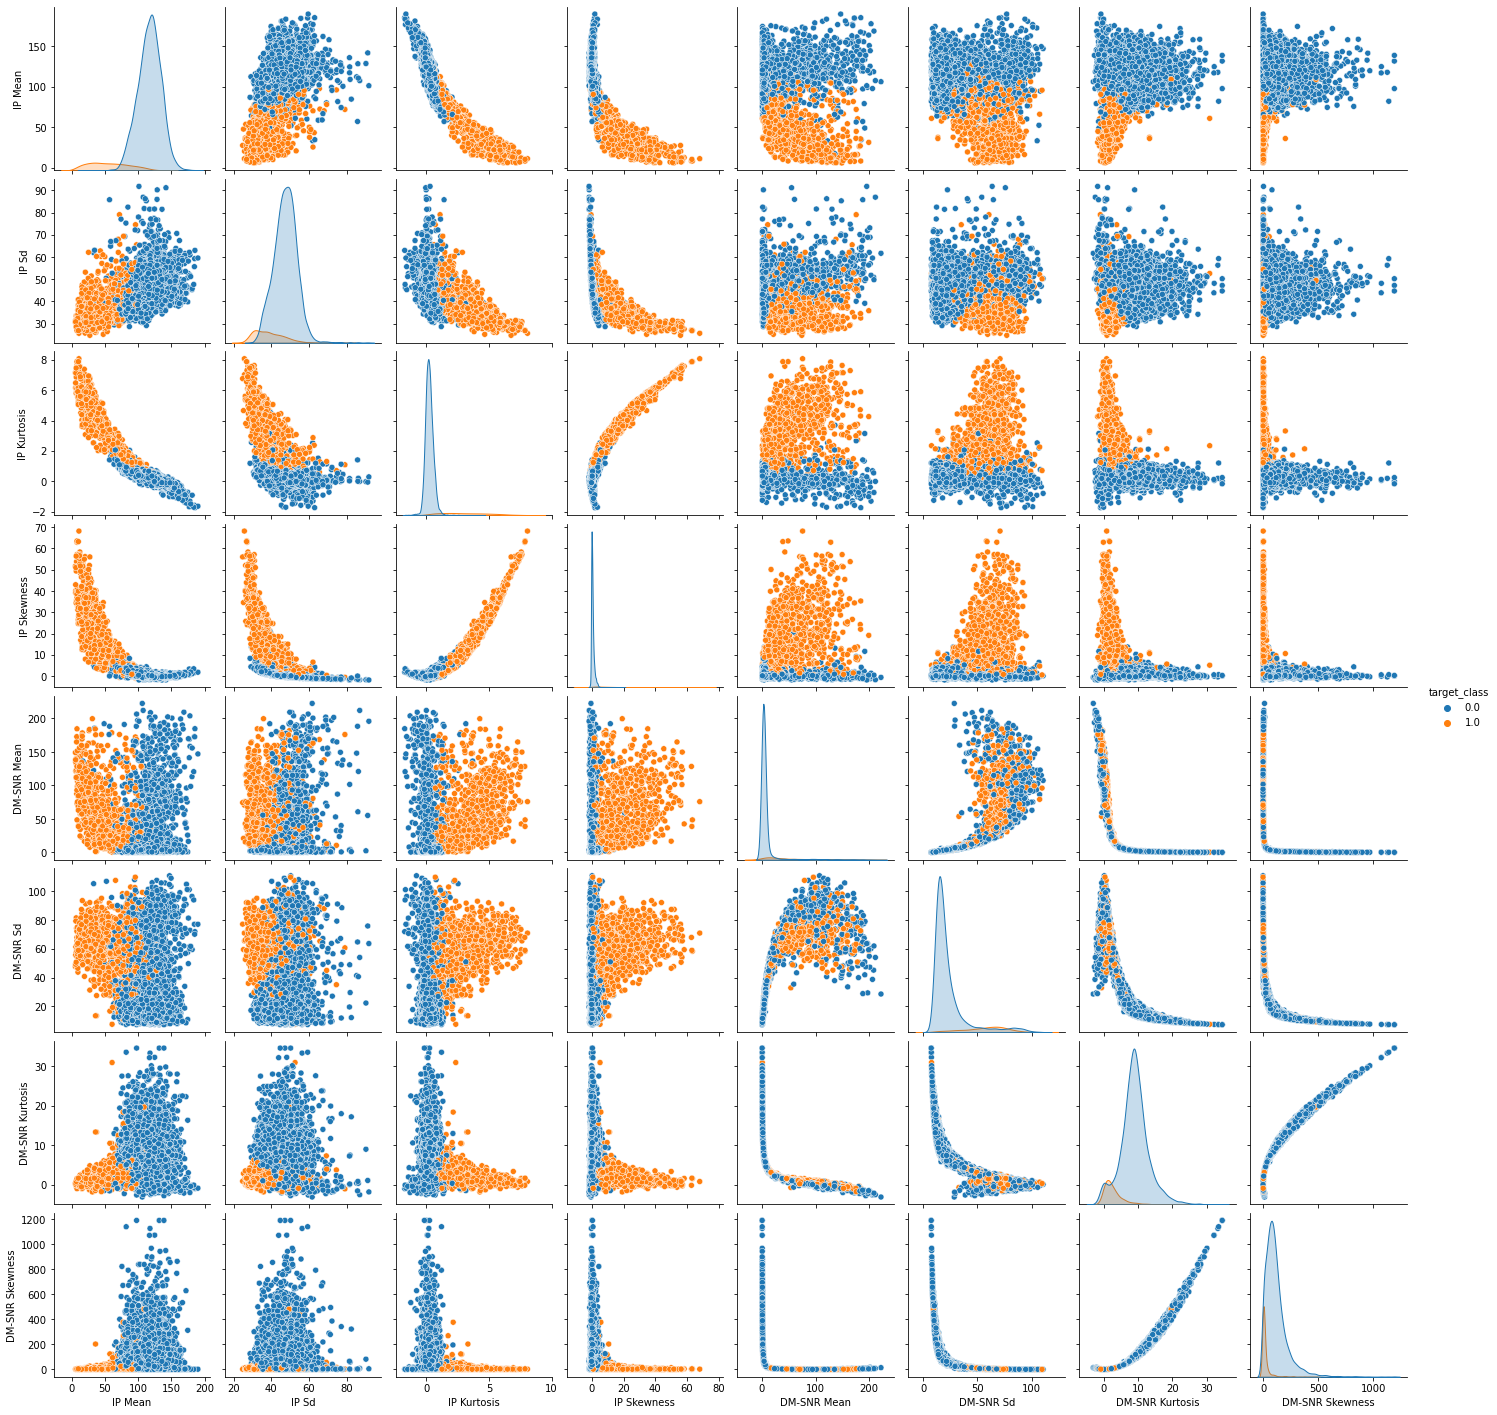

In [46]:
sns.pairplot(data, hue = 'target_class')